In [3]:
# This is Multiclass Classification Problem on the MNIST  Dataset
# 70k image data with each image contain 28*28 pixel size 

In [5]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
## "Flatten" --> is used to convert the High Dimension array into 1D array

In [8]:
# keras conatin the famous "mnist" dataset 
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_test.shape    # it's mean 100000 data with contain each 28*28 

(10000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

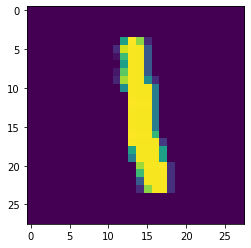

In [13]:
# if we want to see the data
import matplotlib.pyplot as plt
plt.imshow(X_train[6])

In [15]:
X_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [16]:
# from above data we see that single image array may contain the data in range b/w 0-255 so we scalle it 
X_train = X_train/255
X_test = X_test/255


In [19]:
X_train[5]
# now it come in range b/w 0-1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
# Draw the Neural Network mode
X_train.shape
# in case it come in 2-d array we must convert into 1D 

(60000, 28, 28)

In [22]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))   # 784 from the input layer
model.add(Dense(128,activation = "relu"))  # 128 node in the hidden layer
model.add(Dense(32,activation = 'relu'))   # adding extra hidden layer with 32 node
model.add(Dense(10, activation = 'softmax'))    # in output we use softmax when we have more than 1 output during classification problem

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Note:- loss function
""" 1) categorical_crossentropy --[we must do "One Hot Encoder"] Label
2) sparse_categorical_crossentropy --[we not require the "One Hot Encoder" label]
"""


' 1) categorical_crossentropy --[we must do "One Hot Encoder"] Label\n2) sparse_categorical_crossentropy --[we not require the "One Hot Encoder" label]\n'

In [27]:
# model is build let's compile and then predict it 
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy']) 
# in case we add also accuracy which give ---> accuracy


In [30]:
# train the model
history = model.fit(X_train,y_train,epochs = 20,validation_split = 0.2)  
# pure training data me se apne 20% row randomly alag ker dega for validation purpose [loss -> val_loss or accuracy --> val_accuracy]

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0090 - val_accuracy: 0.9973
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0106 - val_accuracy: 0.9967
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0083 - val_accuracy: 0.9970
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0104 - val_accuracy: 0.9967
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9987
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0288 - val_accuracy: 0.9922
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0221 - val_accuracy:

In [35]:
# predict
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 0s 1ms/step


array([[8.13823292e-22, 9.78881298e-19, 3.47439971e-16, ...,
        9.99999940e-01, 6.75964741e-26, 2.17000287e-19],
       [0.00000000e+00, 1.87534616e-27, 9.99999940e-01, ...,
        1.07961874e-35, 0.00000000e+00, 0.00000000e+00],
       [1.57816949e-20, 9.99999940e-01, 1.07326648e-12, ...,
        9.59889737e-11, 3.64279191e-13, 1.18574550e-23],
       ...,
       [0.00000000e+00, 4.91096636e-26, 4.97852737e-35, ...,
        9.29530151e-19, 8.48171964e-29, 3.87449985e-21],
       [4.12841128e-22, 0.00000000e+00, 0.00000000e+00, ...,
        1.05157792e-32, 6.58413755e-21, 6.26321634e-30],
       [7.73052163e-17, 0.00000000e+00, 5.33919106e-25, ...,
        1.27516192e-21, 1.17496433e-26, 1.95491952e-30]], dtype=float32)

In [36]:
# in case 1 array conatin the 10 o/p with different wightage so we use the 
#### argmax(axis = 1)   ye apne ko beta dega ki konse index or array per higer probalility he 
y_pred = y_prob.argmax(axis = 1)

In [37]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
# Now test accuracy 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9779

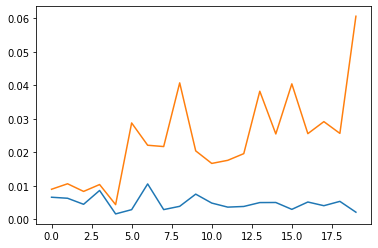

In [41]:
# now we can plot the graph with validation to see that overfitting occur or not 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

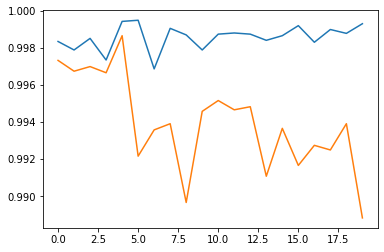

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

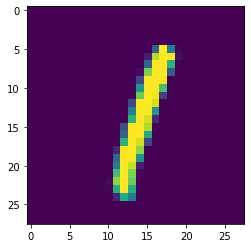

In [46]:
plt.imshow(X_test[5])

In [48]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 22ms/step


array([1])

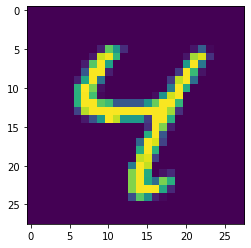

In [49]:
plt.imshow(X_test[6])

In [50]:
model.predict(X_test[6].reshape(1,28,28))

1/1 [==============================] - 0s 22ms/step


array([[1.3905097e-29, 2.5263399e-18, 2.7161425e-18, 6.8213973e-20,
        1.0000000e+00, 2.3581066e-18, 4.5864412e-25, 1.7535490e-11,
        3.4532574e-13, 7.6786742e-14]], dtype=float32)

In [51]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 20ms/step


array([4])